# Estudio de Mercado para la factibilidad de Cafeterias Operadas por Robots

## Introducción

En el siguiente proyecto se desea realizar el estudio de mercado referente a abrir un cafe regentado por robots.

Se trabajará con datos procedentes de fuentes abiertas sobre restaurantes en LA, que contiene direcciones, nombre de los locales, un id, si pertenecen o no a una cadena, el tipo de local y el numero de asientos de cada local.

Tabla de contenido

1.1 Carga de librerias

1.2 Carga de dataset

1.3 Pre-Procesamiento de datos

1.4 Analisis de Datos

       1.4.1  Investigar las proporciones de los distintos tipos de establecimientos

       1.4.2  Investigar las proporciones de los establecimientos que pertenecen a una cadena y de los que no

       1.4.3 ¿Qué tipo de establecimiento es habitualmente una cadena?

       1.4.4  ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos    establecimientos con un montón de asientos?

       1.4.5 Determinar el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos?

       1.4.6 Determinar que cantidad de restaurantes hay en cada una de ellas.
       
       1.4.7 Trazar un gráfico de las diez mejores calles por número de restaurantes.
       
       1.4.8 Encontrar el número de calles que solo tienen un restaurante.
       
       1.4.9 Calculo del número de asientos por calle
       
       1.4.10 Analisis de distribución del numero de asientos en las mejores calles
       
       1.4.11 Analisis del estblecimiento Cafe
       
2 Conclusiones

3 Recomendaciones
       


### Carga de librerias

In [93]:
#Carga de librerias
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

### Carga de dataset

In [94]:
try:
    rest_data=pd.read_csv('rest_data_us.csv')
except:
    rest_data=pd.read_csv('/datasets/rest_data_us.csv')

In [95]:
#rest_data=pd.read_csv('/datasets/rest_data_us.csv')
rest_data.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


### Pre-Procesamiento de datos

In [96]:
#Explorando el dataset 
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [97]:
#confirmando de que no hayan valores NAN
rest_data.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [98]:
#Buscando valores duplicados
rest_data.duplicated().sum()

0

In [99]:
rest_data['object_type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

Para esta primera parte se realizaran los siguientes cambios:

Cambio de nombre de las columnas para que sean más comprensibles

Identificar los valores NAN y procesarlos

Se cambiaran a mayusculas todas las direcciones de contenidas en address

In [100]:
#Cambio de nombre de la columna
rest_data=rest_data.rename(columns={'id':'id',
                                   'object_name':'rest_name',
                                   'chain':'chain',
                                   'object_type':'rest_type',
                                   'address':'address',
                                   'number':'number_of_seats'})

In [101]:
rest_data.head()

,id,rest_name,address,chain,rest_type,number_of_seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [102]:
#Trabajar los valores NAN
rest_data.loc[rest_data['chain'].isna()]

,id,rest_name,address,chain,rest_type,number_of_seats
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [103]:
#Revisando en que consiste que un restaurante sea una cadena
rest_chain=rest_data[rest_data['chain']==True]
rest_chain

,id,rest_name,address,chain,rest_type,number_of_seats
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
...,...,...,...,...,...,...
9629,21415,JUCUAPA BAKERY,2810 JAMES WOOD BLVD,True,Bakery,10
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD # A-B,True,Restaurant,47
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15


In [104]:
rest_chain['rest_type'].value_counts()

Restaurant    2292
Fast Food      605
Bakery         283
Cafe           266
Pizza          153
Bar             77
Name: rest_type, dtype: int64

In [105]:
rest_chain[rest_chain['rest_type']=='Restaurant']['number_of_seats'].value_counts()

25     60
12     54
21     48
23     48
9      48
       ..
226     1
73      1
224     1
121     1
174     1
Name: number_of_seats, Length: 197, dtype: int64

In [106]:
rest_chain[rest_chain['rest_type']=='Fast Food']['number_of_seats'].value_counts()

7      18
1      17
28     17
29     17
15     16
       ..
86      1
195     1
177     1
191     1
135     1
Name: number_of_seats, Length: 122, dtype: int64

In [107]:
rest_chain[rest_chain['rest_type']=='Bakery']['number_of_seats'].value_counts()

20     14
18     13
8      13
3      12
22     12
17     12
21     12
26     11
1      10
10     10
16      9
12      9
4       9
29      8
24      8
23      8
11      8
6       7
2       7
13      7
19      6
15      6
27      6
7       6
5       6
14      6
25      5
28      4
33      3
9       3
45      3
35      2
40      2
43      2
39      2
48      2
42      2
83      1
37      1
41      1
84      1
34      1
99      1
206     1
126     1
161     1
77      1
90      1
218     1
96      1
95      1
66      1
129     1
67      1
38      1
Name: number_of_seats, dtype: int64

In [108]:
rest_chain['rest_name'].value_counts()

THE COFFEE BEAN & TEA LEAF               47
SUBWAY                                   31
DOMINO'S PIZZA                           15
KENTUCKY FRIED CHICKEN                   14
WABA GRILL                               14
                                         ..
GREYHOUND FOOD SERVICE INC                1
YUM YUM DONUTS # 75-P                     1
STARBUCKS COFFEE #13286                   1
THE FRENCH CREPE COMPANY PREP KITCHEN     1
CAFE SPROUTS                              1
Name: rest_name, Length: 2733, dtype: int64

In [109]:
rest_data[rest_data['rest_name']=='TAQUERIA LOS 3 CARNALES']

,id,rest_name,address,chain,rest_type,number_of_seats
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14


In [110]:
rest_data[rest_data['rest_name']=="JAMMIN JIMMY'S PIZZA"]

,id,rest_name,address,chain,rest_type,number_of_seats
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1


In [111]:
rest_data[rest_data['rest_name']=="THE LEXINGTON THEATER"]

,id,rest_name,address,chain,rest_type,number_of_seats
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


Con las pruebas realizadas con anterioridad y la información del dataset no hay forma de confirmar o no si es una cadena o no, por ello, se van a eliminar estos tres restaurantes.

In [112]:
rest_data.dropna(inplace=True)

In [113]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               9648 non-null   int64 
 1   rest_name        9648 non-null   object
 2   address          9648 non-null   object
 3   chain            9648 non-null   object
 4   rest_type        9648 non-null   object
 5   number_of_seats  9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


In [114]:
rest_data[rest_data['rest_name']=="THE LEXINGTON THEATER"]

,id,rest_name,address,chain,rest_type,number_of_seats


In [115]:
rest_data.isna().sum()

id                 0
rest_name          0
address            0
chain              0
rest_type          0
number_of_seats    0
dtype: int64

In [116]:
rest_data.reset_index()

,index,id,rest_name,address,chain,rest_type,number_of_seats
0,0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...,...
9643,9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9644,9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9645,9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9646,9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [117]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               9648 non-null   int64 
 1   rest_name        9648 non-null   object
 2   address          9648 non-null   object
 3   chain            9648 non-null   object
 4   rest_type        9648 non-null   object
 5   number_of_seats  9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


In [118]:
#Cambiar a mayusculas el contenido de la columna address para unificar el criterio de escritura
rest_data['address']=rest_data['address'].str.upper()

In [119]:
rest_data.loc[rest_data['rest_name']=="STARBUCKS"]

,id,rest_name,address,chain,rest_type,number_of_seats
938,12724,STARBUCKS,1401 S ALAMEDA ST,True,Cafe,18
3323,15109,STARBUCKS,400 WORLD WAY,True,Cafe,27
3713,15499,STARBUCKS,300 WORLD WAY # 335,True,Cafe,37
4166,15952,STARBUCKS,600 WORLD WAY # 681,True,Cafe,21
6200,17986,STARBUCKS,1969 ZONAL AVE,True,Cafe,9
6210,17996,STARBUCKS,380 WORLD WAY T51,True,Cafe,25
6542,18328,STARBUCKS,3880 N MISSION RD,True,Cafe,5
7653,19439,STARBUCKS,8700 BEVERLY BLVD PL LE,True,Cafe,10
7818,19604,STARBUCKS,2025 AVENUE OF THE STARS,True,Cafe,22
8865,20651,STARBUCKS,1001 S OLIVE ST,True,Cafe,20


In [120]:
#Después de observar la lista anterior se pasará una limpieza para obtener los nombres de los establecimientos más claros
def clean_rest_name(rest_name):
    clean_rest_name=re.sub(r'^\d+|\s\d+\s|\s#.*|\s\w\d+','', rest_name)
    return clean_rest_name

In [121]:
rest_data['clean_names']=rest_data['rest_name'].apply(clean_rest_name)

In [122]:
rest_data.head()

,id,rest_name,address,chain,rest_type,number_of_seats,clean_names
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,HABITAT COFFEE SHOP
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,REILLY'S
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,STREET CHURROS
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,TRINITI ECHO PARK
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,POLLEN


### Analisis de Datos

In [123]:
#Aplicar el estilo a los gráficos del proyecto
plt.style.use('ggplot')

#### Investigar las proporciones de los distintos tipos de establecimientos

In [124]:
#Investiga las proporciones de los distintos tipos de establecimientos.
#Para ello se trazará un gráfico de barras
rest_data_type=rest_data['rest_type'].value_counts().reset_index()
rest_data_type

,index,rest_type
0,Restaurant,7253
1,Fast Food,1066
2,Cafe,435
3,Pizza,319
4,Bar,292
5,Bakery,283


In [125]:
rest_data_type=rest_data_type.rename(mapper={'index':'restaurant',
                                   'rest_type':'totals'}, axis=1)

In [126]:
rest_data_type

,restaurant,totals
0,Restaurant,7253
1,Fast Food,1066
2,Cafe,435
3,Pizza,319
4,Bar,292
5,Bakery,283


Text(0.5, 1.0, 'Type of restaurants distribution')

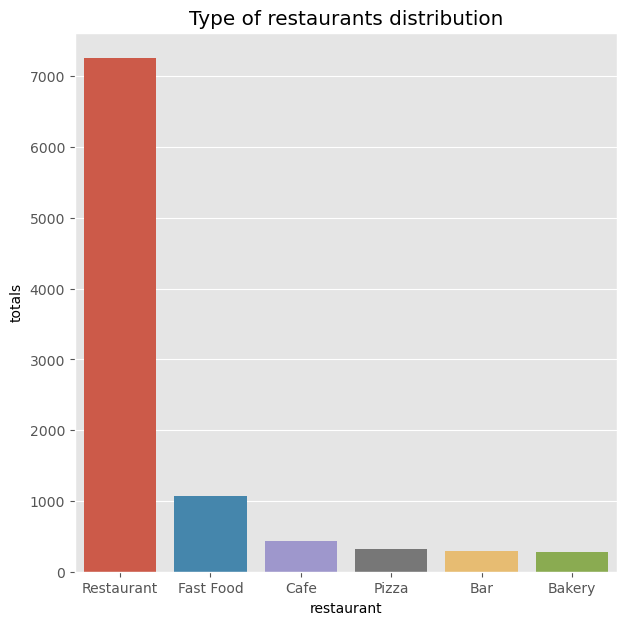

In [127]:
plt.figure(figsize=(7,7))
ax=sns.barplot(x='restaurant', y='totals', data=rest_data_type)
plt.title('Type of restaurants distribution')

In [128]:
proportion_rest=rest_data['rest_type'].value_counts(normalize=True)\
                            .reset_index()
proportion_rest=proportion_rest.rename(mapper={'index':'type',
                                              'rest_type':'proportion'}, axis=1)

proportion_rest

,type,proportion
0,Restaurant,0.751762
1,Fast Food,0.110489
2,Cafe,0.045087
3,Pizza,0.033064
4,Bar,0.030265
5,Bakery,0.029333


Text(0, 0.5, 'proportion %')

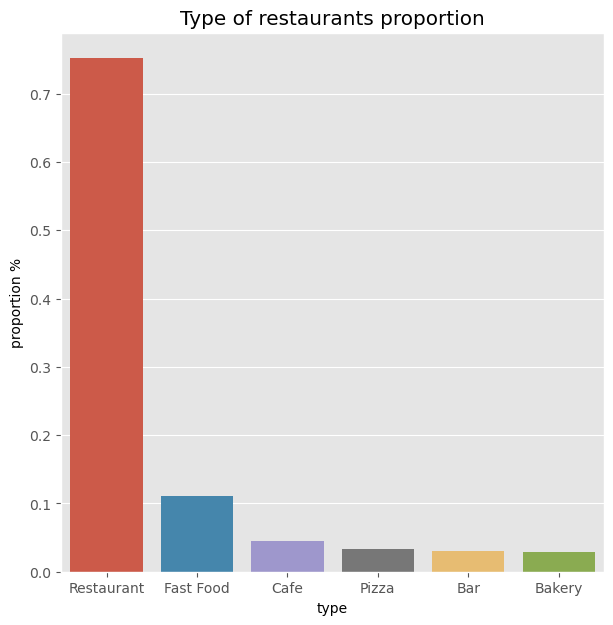

In [129]:
plt.figure(figsize=(7,7))
ax=sns.barplot(x='type', y='proportion', data=proportion_rest)
plt.title('Type of restaurants proportion')
plt.ylabel('proportion %')

El 75% de los establecimientos son restaurantes, le sigue las fast foods con 11%, en tercer lugar estan los cafés con el 4.5%

#### Investigar las proporciones de los establecimientos que pertenecen a una cadena y de los que no

In [130]:

#Vamos a utilizar el dataset rest_chain donde estan filtrados los restaurantes que pertenecen a una cadena
rest_chain.head(10)

,id,rest_name,address,chain,rest_type,number_of_seats
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
15,11801,FOOD COURT TRAY WASHING AREA,928 S WESTERN AVE STE 300,True,Restaurant,21
24,11810,M CAFE DE CHAYA,7119 MELROSE AVE,True,Restaurant,43
27,11813,NORM'S RESTAURANT,470 N LA CIENEGA BLVD,True,Restaurant,80
29,11815,KRISPY KRUNCHY CHICKEN - ALVARADO,600 S ALVARADO ST STE 111C,True,Restaurant,15
31,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118


In [131]:
rest_chain_distribution=rest_chain['rest_type'].value_counts().reset_index()
rest_chain_distribution

,index,rest_type
0,Restaurant,2292
1,Fast Food,605
2,Bakery,283
3,Cafe,266
4,Pizza,153
5,Bar,77


In [132]:
rest_chain_distribution=rest_chain_distribution.rename(mapper={'index':'kind',
                                                              'rest_type':'quantity'},axis=1)

In [133]:
rest_chain_distribution

,kind,quantity
0,Restaurant,2292
1,Fast Food,605
2,Bakery,283
3,Cafe,266
4,Pizza,153
5,Bar,77


Text(0.5, 1.0, 'Chain distribution by type of restaurant')

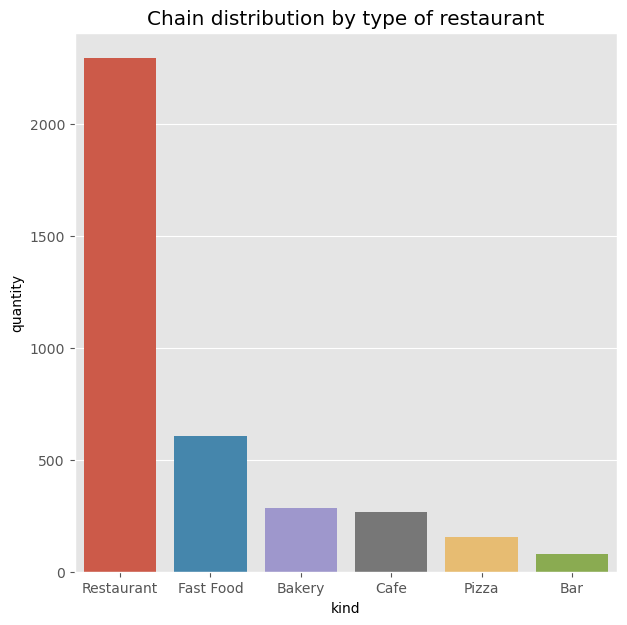

In [134]:
plt.figure(figsize=(7,7))
ax=sns.barplot(x='kind', y='quantity', data=rest_chain_distribution)
plt.title('Chain distribution by type of restaurant')

In [135]:
#Vamos a utilizar el dataset rest_no_chain donde estan filtrados los restaurantes que no pertenecen a una cadena
rest_no_chain=rest_data[rest_data['chain']==False]
rest_no_chain.head(10)

,id,rest_name,address,chain,rest_type,number_of_seats,clean_names
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,HABITAT COFFEE SHOP
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,REILLY'S
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,STREET CHURROS
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,TRINITI ECHO PARK
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,POLLEN
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,THE SPOT GRILL
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,CPK
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,PHO LALA
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35,UPSTAIRS
13,11799,POPULAR DONUTS,3614 W SLAUSON AVE,False,Fast Food,18,POPULAR DONUTS


In [136]:
rest_no_chain_distribution=rest_no_chain['rest_type'].value_counts().reset_index()
rest_no_chain_distribution

,index,rest_type
0,Restaurant,4961
1,Fast Food,461
2,Bar,215
3,Cafe,169
4,Pizza,166


In [137]:
rest_no_chain_distribution=rest_no_chain_distribution.rename(mapper={'index':'kind',
                                                                    'rest_type':'quantity'},axis=1)

In [138]:
rest_no_chain_distribution

,kind,quantity
0,Restaurant,4961
1,Fast Food,461
2,Bar,215
3,Cafe,169
4,Pizza,166


Text(0.5, 1.0, 'No chain distribution by type of restaurant')

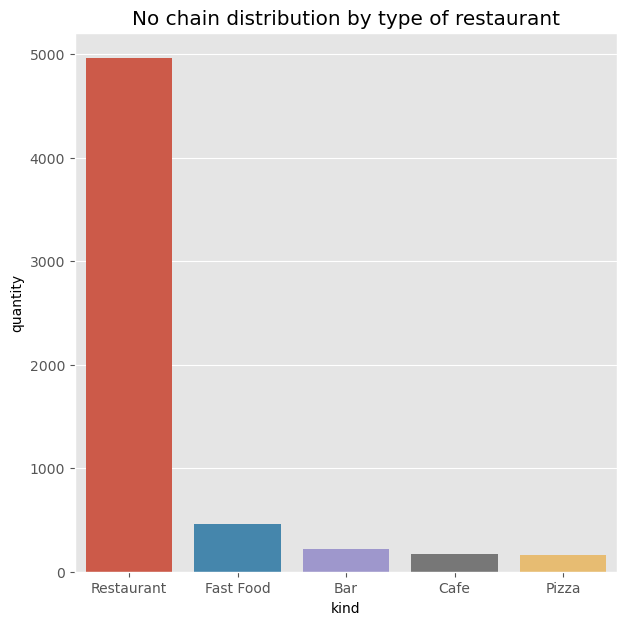

In [139]:
plt.figure(figsize=(7,7))
ax=sns.barplot(x='kind', y='quantity', data=rest_no_chain_distribution)
plt.title('No chain distribution by type of restaurant')

La proporción de restaurantes de los que no son cadenas duplica a los que son de tipo cadena (4961 a 2292), se puede ver que las bakery están presentes en los del tipo cadena.

In [140]:
comparison_rest= rest_chain_distribution.merge(rest_no_chain_distribution, how='left', on='kind')
comparison_rest

,kind,quantity_x,quantity_y
0,Restaurant,2292,4961.0
1,Fast Food,605,461.0
2,Bakery,283,NaN
3,Cafe,266,169.0
4,Pizza,153,166.0
5,Bar,77,215.0


In [141]:
comparison_rest=comparison_rest.rename(mapper={'kind':'kind',
                                             'quantity_x':'chain', 'quantity_y':'no_chain'},
                                             axis=1)

#### ¿Qué tipo de establecimiento es habitualmente una cadena?


In [142]:
comparison_rest

,kind,chain,no_chain
0,Restaurant,2292,4961.0
1,Fast Food,605,461.0
2,Bakery,283,NaN
3,Cafe,266,169.0
4,Pizza,153,166.0
5,Bar,77,215.0


Observando la tabla anterior se puede notar que las fast food generalmente son establecimiento de cadena. Restaurant está en primer lugar pero en la columna no_chain el valor lo duplica (2292 como cadena y 4961 como no cadena)

#### ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

In [143]:
#Dataset que filtra los restaurantes que pertenecen a una cadena
rest_chain_filtered=rest_data.loc[rest_data['chain']==True]

In [144]:
rest_chain_filtered.head()

,id,rest_name,address,chain,rest_type,number_of_seats,clean_names
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,ABC DONUTS
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,EL POLLO LOCO
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17,POONG NYUN BAKERY
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133,EMC RESTAURANT GROUP LLC
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,CUSCATLECA BAKERY


In [145]:
#Cantidad de asientos por cadena
rest_chain_size=rest_chain_filtered.groupby('clean_names')['number_of_seats'].sum().reset_index().sort_values(by='number_of_seats', ascending=False)
rest_chain_size.head(10)

,clean_names,number_of_seats
1176,MCDONALD'S,7561
791,JACK IN THE BOX,3497
192,BURGER KING,3222
517,EL POLLO LOCO,2442
1717,STARBUCKS COFFEE,2162
238,CARL'S JR,2128
1731,SUBWAY,1922
1776,TACO BELL,1456
1690,SOUPLANTATION,1402
1843,THE COFFEE BEAN & TEA LEAF,1338


In [146]:
rest_chain_size=rest_chain_size.rename(mapper={'clean_names':'rest_name',
                                              'number_of_seats':'number_of_seats'}, axis=1)

In [147]:
rest_chain_size.head()

,rest_name,number_of_seats
1176,MCDONALD'S,7561
791,JACK IN THE BOX,3497
192,BURGER KING,3222
517,EL POLLO LOCO,2442
1717,STARBUCKS COFFEE,2162


In [148]:
#Ver la cantidad de locales por cadena
count_rest_chain=rest_chain_filtered['clean_names'].value_counts().reset_index()
count_rest_chain.head(10)

,index,clean_names
0,SUBWAY,117
1,STARBUCKS COFFEE,87
2,MCDONALD'S,80
3,JACK IN THE BOX,53
4,THE COFFEE BEAN & TEA LEAF,51
5,BURGER KING,38
6,EL POLLO LOCO,36
7,STARBUCKS,31
8,TACO BELL,30
9,DOMINO'S PIZZA,30


In [149]:
count_rest_chain=count_rest_chain.rename(mapper={'index':'rest_name',
                                              'clean_names':'quantity'}, axis=1)
count_rest_chain.head(10)

,rest_name,quantity
0,SUBWAY,117
1,STARBUCKS COFFEE,87
2,MCDONALD'S,80
3,JACK IN THE BOX,53
4,THE COFFEE BEAN & TEA LEAF,51
5,BURGER KING,38
6,EL POLLO LOCO,36
7,STARBUCKS,31
8,TACO BELL,30
9,DOMINO'S PIZZA,30


In [150]:
merge_names_and_size=count_rest_chain.merge(rest_chain_size, how='left', on='rest_name').sort_values(by='number_of_seats',
                                                                                                    ascending=False)
merge_names_and_size.head(10)

,rest_name,quantity,number_of_seats
2,MCDONALD'S,80,7561
3,JACK IN THE BOX,53,3497
5,BURGER KING,38,3222
6,EL POLLO LOCO,36,2442
1,STARBUCKS COFFEE,87,2162
13,CARL'S JR,22,2128
0,SUBWAY,117,1922
8,TACO BELL,30,1456
39,SOUPLANTATION,7,1402
4,THE COFFEE BEAN & TEA LEAF,51,1338


In [151]:
merge_names_and_size['seats_per_rest']=(merge_names_and_size['number_of_seats']/merge_names_and_size['quantity']).round()
merge_names_and_size.head(10)

,rest_name,quantity,number_of_seats,seats_per_rest
2,MCDONALD'S,80,7561,95.0
3,JACK IN THE BOX,53,3497,66.0
5,BURGER KING,38,3222,85.0
6,EL POLLO LOCO,36,2442,68.0
1,STARBUCKS COFFEE,87,2162,25.0
13,CARL'S JR,22,2128,97.0
0,SUBWAY,117,1922,16.0
8,TACO BELL,30,1456,49.0
39,SOUPLANTATION,7,1402,200.0
4,THE COFFEE BEAN & TEA LEAF,51,1338,26.0


In [152]:
merge_names_and_size.tail(10)

,rest_name,quantity,number_of_seats,seats_per_rest
759,VICKY'S RESTAURANT,1,1,1.0
1822,BUMSAN ORGANIC MILK BAR,1,1,1.0
543,"MILK+T, INC",1,1,1.0
1547,KIKKA SUSHI,1,1,1.0
1515,REGGIE'S DELI & CAFE,1,1,1.0
595,JR BAKERY & PIZZA,1,1,1.0
1637,PANAMERICANA BAKERY,1,1,1.0
831,PARU'S INDIAN RESTAURANT,1,1,1.0
675,LA PLACITA DEL D.F. RESTAURANTE,1,1,1.0
1286,ANGELICA'S BAKERY,1,1,1.0


Se puede observar en las tablas, tanto en la parte superior como en la inferior, que dependiendo de la cadena los hay con pocos locales y muchos asientos, caso de McDonald's, y el caso contrario como Delice Bakery que solo tiene un local y un asiento.

Text(0.5, 0, 'Seats per restaurants')

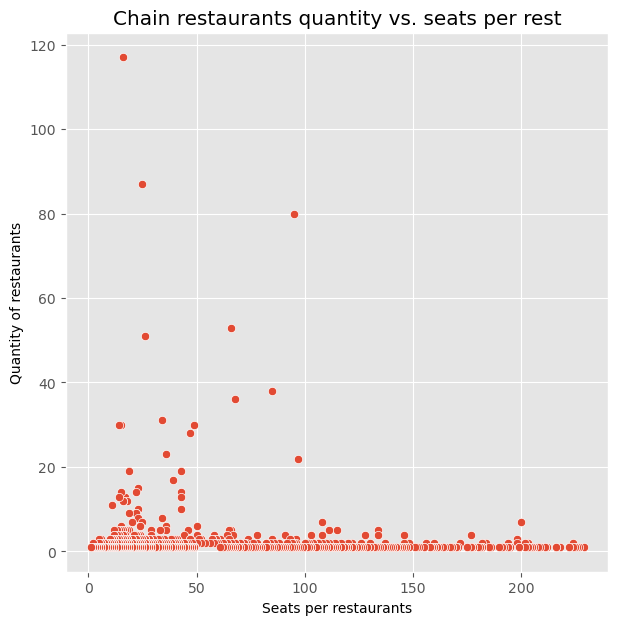

In [153]:
plt.figure(figsize=(7,7))
ax=sns.scatterplot(x="seats_per_rest", y="quantity",data=merge_names_and_size)
plt.title('Chain restaurants quantity vs. seats per rest')
plt.ylabel('Quantity of restaurants')
plt.xlabel('Seats per restaurants')



El diagrama de dispersión muestra que en las cadenas la tendencia es que sean pocos establecimientos con muchos asientos.

#### Determinar el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos?

In [154]:
#Vamos a utilizar el dataset rest_chain donde estan filtrados los restaurantes que pertenecen a una cadena
rest_chain.head(10)

,id,rest_name,address,chain,rest_type,number_of_seats
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
15,11801,FOOD COURT TRAY WASHING AREA,928 S WESTERN AVE STE 300,True,Restaurant,21
24,11810,M CAFE DE CHAYA,7119 MELROSE AVE,True,Restaurant,43
27,11813,NORM'S RESTAURANT,470 N LA CIENEGA BLVD,True,Restaurant,80
29,11815,KRISPY KRUNCHY CHICKEN - ALVARADO,600 S ALVARADO ST STE 111C,True,Restaurant,15
31,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118


In [155]:
number_of_seats_per_rest=rest_chain.groupby('rest_type')['number_of_seats'].mean().reset_index().sort_values(by='number_of_seats',
                                                                                                            ascending=False).round()
number_of_seats_per_rest

,rest_type,number_of_seats
5,Restaurant,45.0
1,Bar,40.0
3,Fast Food,38.0
2,Cafe,26.0
4,Pizza,26.0
0,Bakery,22.0


Text(0.5, 1.0, 'Avg. number of seats per kind of restaurant')

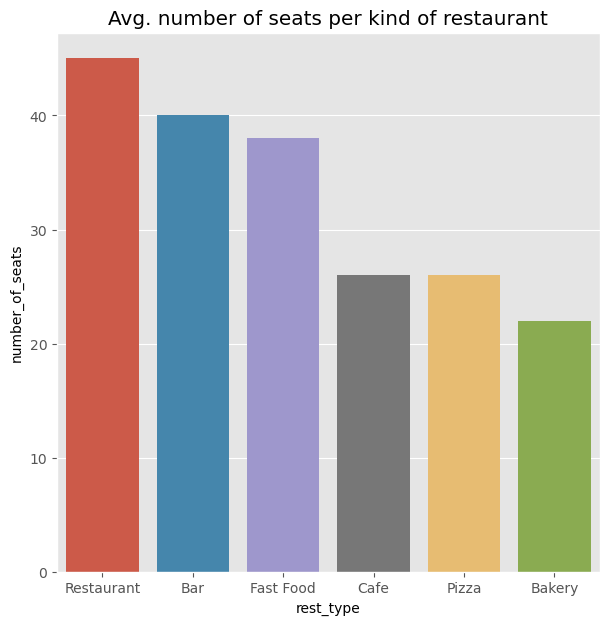

In [156]:
plt.figure(figsize=(7,7))
ax=sns.barplot(data=number_of_seats_per_rest, x='rest_type', y='number_of_seats')
plt.title('Avg. number of seats per kind of restaurant')

Se puede observar que para la categoria Restaurant se tiene un promedio de 45 sillas por local, le sigue Bar con 40 sillas por local.

#### Determinar que cantidad de restaurantes hay en cada una de ellas.

In [209]:
#Crear una columna que contenga el nombre de la calle, se va a aplicar una función lambda con join y split para
#trabajar con el texto contenido en la columna address
rest_data['street']=rest_data['address'].apply(lambda x:' '.join(x.split(' ')[1:])).to_frame()
rest_data.head()


,id,rest_name,address,chain,rest_type,number_of_seats,clean_names,street,clean_street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,HABITAT COFFEE SHOP,N EAGLE ROCK BLVD,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,REILLY'S,WORLD WAY # 120,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,STREET CHURROS,HOLLYWOOD BLVD # 253,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,TRINITI ECHO PARK,W SUNSET BLVD,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,POLLEN,ECHO PARK AVE,ECHO PARK AVE


In [158]:
rest_data['street'].value_counts()[:45]

W SUNSET BLVD           297
W PICO BLVD             289
HOLLYWOOD BLVD          168
WILSHIRE BLVD           161
S VERMONT AVE           148
SANTA MONICA BLVD       146
W 3RD ST                145
BEVERLY BLVD            135
S FIGUEROA ST           134
MELROSE AVE             128
S WESTERN AVE           128
W OLYMPIC BLVD          124
W 6TH ST                100
S CENTRAL AVE            91
VENICE BLVD              86
N FIGUEROA ST            85
WESTWOOD BLVD            84
W 7TH ST                 80
W 8TH ST                 78
E 1ST ST                 78
S BROADWAY               68
WHITTIER BLVD            67
E CESAR E CHAVEZ AVE     66
N WESTERN AVE            63
S LA BREA AVE            62
COLORADO BLVD            60
N VERMONT AVE            59
S SAN PEDRO ST           57
E WHITTIER BLVD          56
W WASHINGTON BLVD        55
W MANCHESTER AVE         54
W SLAUSON AVE            54
WORLD WAY                53
E OLYMPIC BLVD           53
S MAIN ST                53
YORK BLVD           

In [159]:
rest_data['street'].value_counts()[-25:]

W 3RD ST BLDG 11            1
N ROSSMORE AVE              1
W SLAUSON AVE STE #F        1
AVE OF STARS STE 35         1
SANTA MONICA BLVD # FC21    1
POMONA BLVD # 101           1
S WESTERN AVE # 303         1
W 6TH ST # 103              1
WORLD WAY # T235            1
W 3RD ST STE #318           1
W 3RD ST STE 508            1
VALLEY BLVD STE A           1
E YORK BLVD #A              1
W SUNSET BLVD # A120        1
W 3RD ST # K-14             1
S ATLANTIC BLVD # #B        1
WORLD WAY #4708             1
WORLD WAY # 632             1
E VALLEY BLVD STE H         1
W SUNSET BLVD # 150         1
W FLORENCE AVE STE #A       1
W 3RD ST STE 548            1
COLORADO BLVD STE 105       1
W 6TH ST STE 104-5          1
S SAN PEDRO ST STE 111      1
Name: street, dtype: int64

In [160]:
#Después de observar las lista anteriores se pasará una limpieza adicional para obtener las calles más limpias
def clear_street(street):
    clean_street=re.sub(r'^\d+|\s\d+\s|\s#.*|\s\w\d+','', street)
    return clean_street

In [161]:
rest_data['clean_street']=rest_data['street'].apply(clear_street)
rest_data.head(10)

,id,rest_name,address,chain,rest_type,number_of_seats,clean_names,street,clean_street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,HABITAT COFFEE SHOP,N EAGLE ROCK BLVD,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,REILLY'S,WORLD WAY # 120,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,STREET CHURROS,HOLLYWOOD BLVD # 253,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,TRINITI ECHO PARK,W SUNSET BLVD,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,POLLEN,ECHO PARK AVE,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,THE SPOT GRILL,NATIONAL BLVD,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,CPK,WORLD WAY # 126,WORLD WAY
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,PHO LALA,W 6TH ST STE 226,W 6TH ST STE
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,ABC DONUTS,N SAN FERNANDO RD UNIT 103,N SAN FERNANDO RD UNIT
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35,UPSTAIRS,N CAHUENGA BLVD,N CAHUENGA BLVD


In [162]:
rest_data.tail(10)

,id,rest_name,address,chain,rest_type,number_of_seats,clean_names,street,clean_street
9641,21427,OCEAN BASKETS,2851 CRENSHAW BLVD,False,Restaurant,15,OCEAN BASKETS,CRENSHAW BLVD,CRENSHAW BLVD
9642,21428,TOLOSA,2635 WHITTIER BLVD,False,Restaurant,19,TOLOSA,WHITTIER BLVD,WHITTIER BLVD
9643,21429,DIVINE DIPS,601 S LOS ANGELES ST,False,Restaurant,25,DIVINE DIPS,S LOS ANGELES ST,S LOS ANGELES ST
9644,21430,LA BUFADORA BAR,3470 E 1ST ST,False,Bar,24,LA BUFADORA BAR,E 1ST ST,E 1ST ST
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD # 1025,False,Restaurant,225,SAINT MARC,SANTA MONICA BLVD # 1025,SANTA MONICA BLVD
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,HALL OF JUSTICE,W TEMPLE AVE,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,FIN-MELROSE,MELROSE AVE,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,JUICY WINGZ,HOLLYWOOD BLVD,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,MEDIDATE COFFEE,S SPRING ST STE 100,S SPRING ST STE
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19,CAFE SPROUTS,S SAN PEDRO ST STE 111,S SAN PEDRO ST STE


In [205]:
list_of_streets_with_one_rest=rest_data['clean_street'].value_counts()[-10:].reset_index()
list_of_streets_with_one_rest

,index,clean_street
0,ABBOT KINNEY,1
1,ERD ST UNIT 5,1
2,PARK TER,1
3,W 3RD ST STE E-11,1
4,WESTWOOD PLZ STE,1
5,N SAN FERNANDO RD W,1
6,BROADWAY AVE,1
7,GLENDALE BLVD UNIT 2,1
8,W OLYMPIC BLVD UNIT,1
9,W TEMPLE AVE,1


Text(0.5, 0, 'name of streets')

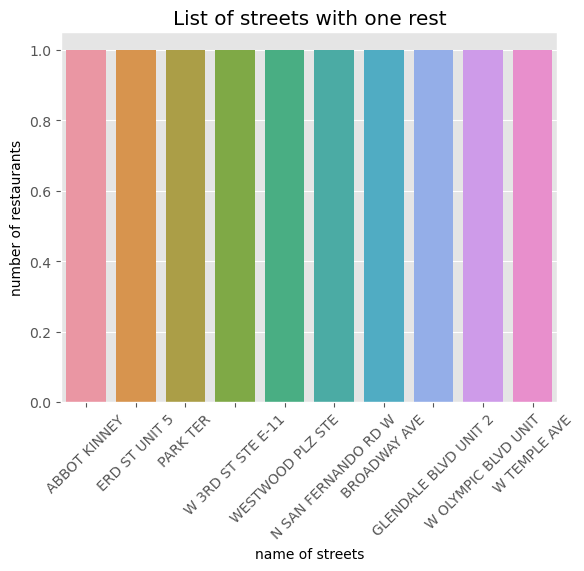

In [207]:
ax=sns.barplot(data=list_of_streets_with_one_rest, x='index', y='clean_street')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('List of streets with one rest')
plt.ylabel('number of restaurants')
plt.xlabel('name of streets')

In [196]:
list_of_streets=rest_data['clean_street'].value_counts()[:10].reset_index()
list_of_streets

,index,clean_street
0,W SUNSET BLVD,320
1,W PICO BLVD,313
2,WILSHIRE BLVD,247
3,SANTA MONICA BLVD,211
4,S WESTERN AVE,206
5,HOLLYWOOD BLVD,204
6,W 3RD ST,181
7,S FIGUEROA ST,178
8,S VERMONT AVE,174
9,W OLYMPIC BLVD,162


Text(0.5, 0, 'name of streets')

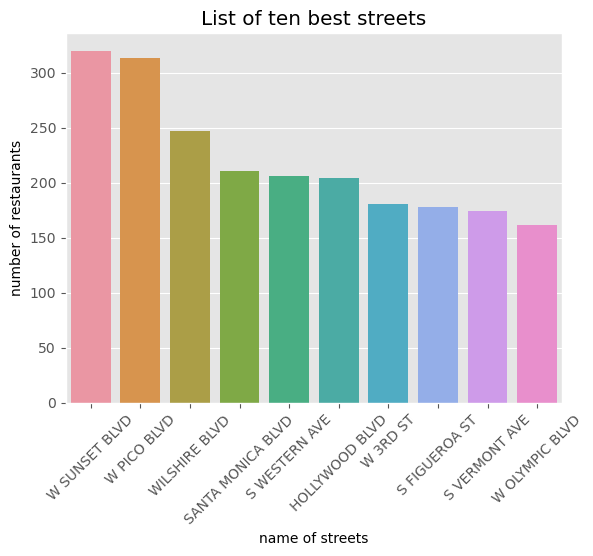

In [204]:
ax=sns.barplot(data=list_of_streets, x='index', y='clean_street')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('List of ten best streets')
plt.ylabel('number of restaurants')
plt.xlabel('name of streets')

En las gráficas de arriba podemos ver las 10 calles con un restaurante y las 10 calles con más restaurantes de Los Angeles

#### Trazar un gráfico de las diez mejores calles por número de restaurantes.

In [165]:
rest_per_street=rest_data.groupby('clean_street')['rest_name'].count().reset_index().sort_values(by='rest_name', ascending=False)
rest_per_street.head(10)

,clean_street,rest_name
1251,W SUNSET BLVD,320
1232,W PICO BLVD,313
1312,WILSHIRE BLVD,247
979,SANTA MONICA BLVD,211
948,S WESTERN AVE,206
363,HOLLYWOOD BLVD,204
1091,W 3RD ST,181
765,S FIGUEROA ST,178
928,S VERMONT AVE,174
1220,W OLYMPIC BLVD,162


In [166]:
rest_per_street=rest_per_street.rename(mapper={'clean_street':'street',
                                              'rest_name':'restaurant_quantity'}, axis=1)

In [167]:
#Se realizará un filtro con las 10 calles con más restaurantes
best_ten_streets=rest_per_street.loc[rest_per_street['restaurant_quantity']>160]
best_ten_streets

,street,restaurant_quantity
1251,W SUNSET BLVD,320
1232,W PICO BLVD,313
1312,WILSHIRE BLVD,247
979,SANTA MONICA BLVD,211
948,S WESTERN AVE,206
363,HOLLYWOOD BLVD,204
1091,W 3RD ST,181
765,S FIGUEROA ST,178
928,S VERMONT AVE,174
1220,W OLYMPIC BLVD,162


Text(0.5, 1.0, 'Number of restaurant per street')

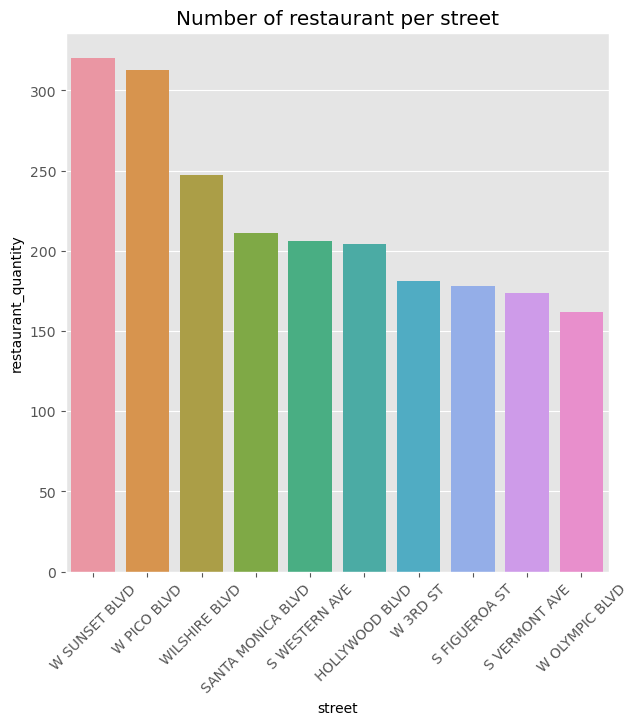

In [168]:
f,ax=plt.subplots(figsize=(7,7))
ax=sns.barplot(data=best_ten_streets, x='street', y='restaurant_quantity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Number of restaurant per street')

#### Encontrar el número de calles que solo tienen un restaurante.

In [169]:
#Se hace un filtro para obtener el número de calles con un restaurante
street_with_one_rest=rest_per_street.loc[rest_per_street['restaurant_quantity']<2]
street_with_one_rest

,street,restaurant_quantity
1005,SEPULVEDA BLVD STE 3,1
867,S MATEO ST,1
880,S OLIVE ST LL-15,1
868,S MC CLINTOCK AVE,1
877,S NORTON AVE,1
...,...,...
607,N SEPULVEDA BLVD STE,1
609,N SOTO ST STE,1
612,N SPRING ST STE 2-3,1
615,N STATE ST RM,1


In [170]:
print(f'Hay {len(street_with_one_rest)} calles con un restaurante')

Hay 806 calles con un restaurante


#### Calculo del número de asientos por calle

In [171]:
seats_per_street=rest_data.groupby('clean_street')['number_of_seats'].sum().reset_index().sort_values(by='number_of_seats', ascending=False)
seats_per_street.head(10)

,clean_street,number_of_seats
1251,W SUNSET BLVD,15994
1312,WILSHIRE BLVD,13521
1232,W PICO BLVD,12528
363,HOLLYWOOD BLVD,11673
948,S WESTERN AVE,8709
1220,W OLYMPIC BLVD,8656
765,S FIGUEROA ST,8416
928,S VERMONT AVE,7868
979,SANTA MONICA BLVD,7412
1091,W 3RD ST,7367


#### Analisis de distribución del numero de asientos en las mejores calles

In [172]:
ten_best_streets_for_number_of_seats=seats_per_street.loc[seats_per_street['number_of_seats']>7366]
ten_best_streets_for_number_of_seats

,clean_street,number_of_seats
1251,W SUNSET BLVD,15994
1312,WILSHIRE BLVD,13521
1232,W PICO BLVD,12528
363,HOLLYWOOD BLVD,11673
948,S WESTERN AVE,8709
1220,W OLYMPIC BLVD,8656
765,S FIGUEROA ST,8416
928,S VERMONT AVE,7868
979,SANTA MONICA BLVD,7412
1091,W 3RD ST,7367


In [173]:
ten_best_streets_for_number_of_seats=ten_best_streets_for_number_of_seats.rename(mapper={'clean_street':'street',
                                                                                        'number_of_seats':'number_of_seats'}, axis=1)
ten_best_streets_for_number_of_seats

,street,number_of_seats
1251,W SUNSET BLVD,15994
1312,WILSHIRE BLVD,13521
1232,W PICO BLVD,12528
363,HOLLYWOOD BLVD,11673
948,S WESTERN AVE,8709
1220,W OLYMPIC BLVD,8656
765,S FIGUEROA ST,8416
928,S VERMONT AVE,7868
979,SANTA MONICA BLVD,7412
1091,W 3RD ST,7367


In [174]:
seats_and_rest_merged=ten_best_streets_for_number_of_seats.merge(best_ten_streets, on='street', how='left')
seats_and_rest_merged

,street,number_of_seats,restaurant_quantity
0,W SUNSET BLVD,15994,320
1,WILSHIRE BLVD,13521,247
2,W PICO BLVD,12528,313
3,HOLLYWOOD BLVD,11673,204
4,S WESTERN AVE,8709,206
5,W OLYMPIC BLVD,8656,162
6,S FIGUEROA ST,8416,178
7,S VERMONT AVE,7868,174
8,SANTA MONICA BLVD,7412,211
9,W 3RD ST,7367,181


Text(0.5, 1.0, 'Seat distribution per street')

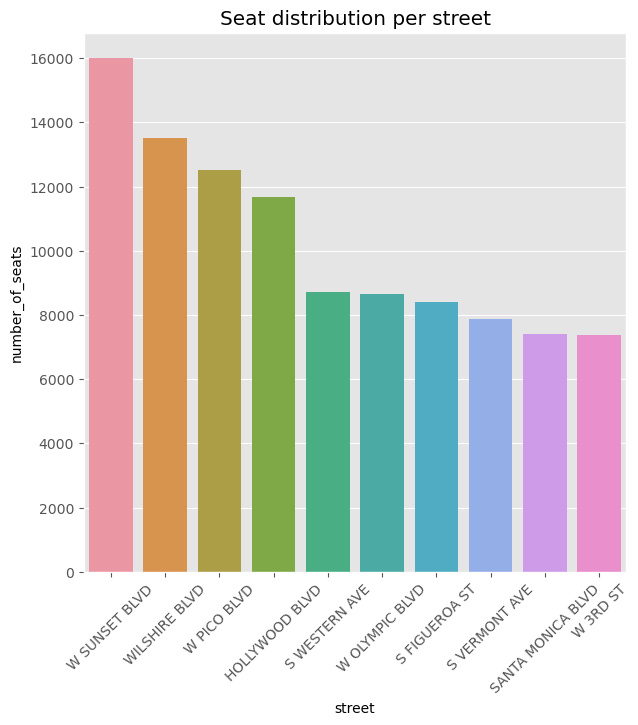

In [175]:
plt.figure(figsize=(7,7))
ax=sns.barplot(data= seats_and_rest_merged, x='street', y='number_of_seats')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Seat distribution per street')

In [176]:
kind_rest_seat_dist=rest_data[rest_data['clean_street'].isin(best_ten_streets['street'])]
kind_rest_seat_dist

,id,rest_name,address,chain,rest_type,number_of_seats,clean_names,street,clean_street
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,STREET CHURROS,HOLLYWOOD BLVD # 253,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,TRINITI ECHO PARK,W SUNSET BLVD,W SUNSET BLVD
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,EL POLLO LOCO,W SUNSET BLVD,W SUNSET BLVD
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,CUSCATLECA BAKERY,W SUNSET BLVD #A,W SUNSET BLVD
16,11802,HMS BOUNTY,3357 WILSHIRE BLVD,False,Restaurant,147,HMS BOUNTY,WILSHIRE BLVD,WILSHIRE BLVD
...,...,...,...,...,...,...,...,...,...
9628,21414,KIFF KAFE,12217 W PICO BLVD,False,Restaurant,29,KIFF KAFE,W PICO BLVD,W PICO BLVD
9635,21421,THE TEA & COFFEE EXCHANGE,6801 HOLLYWOOD BLVD # 120,False,Cafe,4,THE TEA & COFFEE EXCHANGE,HOLLYWOOD BLVD # 120,HOLLYWOOD BLVD
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135,MCDONALD'S,S WESTERN AVE,S WESTERN AVE
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD # 1025,False,Restaurant,225,SAINT MARC,SANTA MONICA BLVD # 1025,SANTA MONICA BLVD


In [177]:
seat_dist=kind_rest_seat_dist.groupby(['rest_type', 
                                       'chain'])['number_of_seats'].mean().round().reset_index().sort_values(by='number_of_seats',
                                                                                                           ascending=False)
seat_dist

,rest_type,chain,number_of_seats
9,Restaurant,False,50.0
10,Restaurant,True,50.0
1,Bar,False,47.0
6,Fast Food,True,47.0
7,Pizza,False,42.0
2,Bar,True,34.0
8,Pizza,True,31.0
5,Fast Food,False,26.0
0,Bakery,True,25.0
4,Cafe,True,23.0


Text(0.5, 1.0, 'Seat distribution per kind of restaurant')

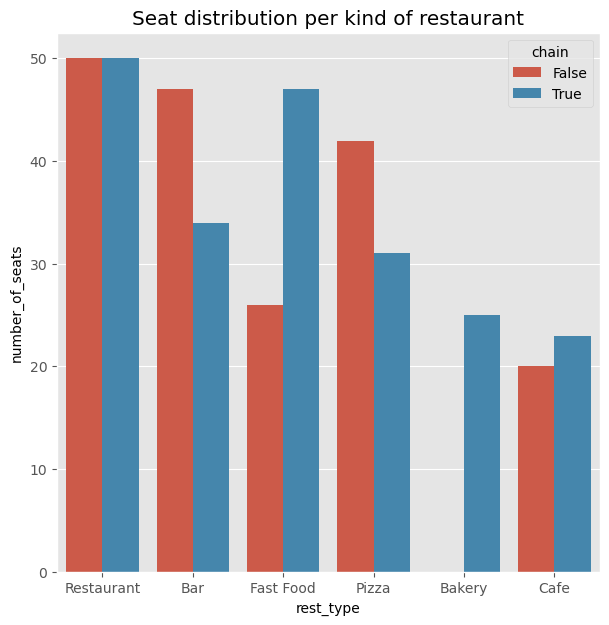

In [178]:
#Se hará a continuación un gráfico con la distribución de los asientos por tipo de restaurante
plt.figure(figsize=(7,7))

sns.barplot(data= seat_dist, x='rest_type', y='number_of_seats', hue='chain')
plt.title('Seat distribution per kind of restaurant')

Se puede observar como se distribuyen los asientos en promedio entre los distintos tipos de restaurantes, los restaurantes tienen el mayor promedio de asientos con 50 asientos por local, le sigue Bar con 47 para los que no pertenecen a una cadena y 34 cuando no lo son. La que tiene menos asiento son los cafes con 23 cuando son cadenas y 20 cuando no lo son.

#### Analisis del establecimiento Cafe

In [179]:
cafe_count=kind_rest_seat_dist.loc[kind_rest_seat_dist['rest_type']=='Cafe']
cafe_count

,id,rest_name,address,chain,rest_type,number_of_seats,clean_names,street,clean_street
155,11941,MILLIE'S COFFEE SHOP,3524 W SUNSET BLVD,False,Cafe,22,MILLIE'S COFFEE SHOP,W SUNSET BLVD,W SUNSET BLVD
156,11942,ANDANTE COFFEE ROASTERS,2201 W SUNSET BLVD,True,Cafe,4,ANDANTE COFFEE ROASTERS,W SUNSET BLVD,W SUNSET BLVD
495,12281,STARBUCKS COFFEE #6688,1601 WILSHIRE BLVD,True,Cafe,37,STARBUCKS COFFEE,WILSHIRE BLVD,WILSHIRE BLVD
1149,12935,STARBUCKS COFFEE #546,10911 W PICO BLVD,True,Cafe,42,STARBUCKS COFFEE,W PICO BLVD,W PICO BLVD
1198,12984,CRAFT COFFEE AND GOOD FOOD CAFE,5636 HOLLYWOOD BLVD,True,Cafe,25,CRAFT COFFEE AND GOOD FOOD CAFE,HOLLYWOOD BLVD,HOLLYWOOD BLVD
...,...,...,...,...,...,...,...,...,...
9281,21067,STARBUCKS COFFEE #5488,5020 WILSHIRE BLVD,True,Cafe,27,STARBUCKS COFFEE,WILSHIRE BLVD,WILSHIRE BLVD
9285,21071,STARBUCKS-17413,3584 S FIGUEROA ST # #3,True,Cafe,31,STARBUCKS-17413,S FIGUEROA ST # #3,S FIGUEROA ST
9449,21235,CLOVE COFFEE,5007 W PICO BLVD,False,Cafe,8,CLOVE COFFEE,W PICO BLVD,W PICO BLVD
9598,21384,GOOD PEOPLE COFFEE CO,11609 SANTA MONICA BLVD,False,Cafe,2,GOOD PEOPLE COFFEE CO,SANTA MONICA BLVD,SANTA MONICA BLVD


In [180]:
#Calculo de percentiles para optener la cantidad de asientos de los cafés en las calles principales
np.percentile(cafe_count['number_of_seats'],[50,75,95,100]).round()

array([21., 31., 45., 49.])

Los Cafés en las calles con más locales tienen en su 50% 21 asientos, en su 75%, 31 asientos un 5% tiene más de 45 asientos hasta un máximo de 49.

In [181]:
#Hallando el número de cafeterias en las diez mejores calles

cafe_count_best_street=cafe_count.groupby('clean_street')['rest_type'].count().reset_index().sort_values(by='rest_type',
                                                                                                        ascending=False)
cafe_count_best_street

,clean_street,rest_type
8,W SUNSET BLVD,22
9,WILSHIRE BLVD,12
7,W PICO BLVD,11
4,SANTA MONICA BLVD,10
0,HOLLYWOOD BLVD,8
1,S FIGUEROA ST,6
5,W 3RD ST,6
6,W OLYMPIC BLVD,5
3,S WESTERN AVE,4
2,S VERMONT AVE,2


In [182]:
cafe_count_best_street=cafe_count_best_street.rename(mapper={'clean_street':'street',
                                                            'rest_type':'cafe_quantity'}, axis=1)

In [183]:
cafe_proportion=best_ten_streets.merge(cafe_count_best_street, on='street', how='left')
cafe_proportion

,street,restaurant_quantity,cafe_quantity
0,W SUNSET BLVD,320,22
1,W PICO BLVD,313,11
2,WILSHIRE BLVD,247,12
3,SANTA MONICA BLVD,211,10
4,S WESTERN AVE,206,4
5,HOLLYWOOD BLVD,204,8
6,W 3RD ST,181,6
7,S FIGUEROA ST,178,6
8,S VERMONT AVE,174,2
9,W OLYMPIC BLVD,162,5


In [184]:
#Hallar la proporción de cafeterias en las 10 calles con más restaurantes
cafe_proportion['cafe_proportion']=(cafe_proportion['cafe_quantity']/cafe_proportion['restaurant_quantity'])
cafe_proportion['cafe_proportion']=cafe_proportion['cafe_proportion'].map('{:.1%}'.format)
cafe_proportion

,street,restaurant_quantity,cafe_quantity,cafe_proportion
0,W SUNSET BLVD,320,22,6.9%
1,W PICO BLVD,313,11,3.5%
2,WILSHIRE BLVD,247,12,4.9%
3,SANTA MONICA BLVD,211,10,4.7%
4,S WESTERN AVE,206,4,1.9%
5,HOLLYWOOD BLVD,204,8,3.9%
6,W 3RD ST,181,6,3.3%
7,S FIGUEROA ST,178,6,3.4%
8,S VERMONT AVE,174,2,1.1%
9,W OLYMPIC BLVD,162,5,3.1%


## Conclusiones

* A lo largo del analisis de datos se pudo observar que el mayor tipo de establecimiento, sean cadenas o no, es el tipo Restaurante. 

* El 75% de los establecimientos son restaurantes, le sigue las fast foods con 11%, en tercer lugar estan los cafés con el 4.5%

* Para los tipos de establecimientos en las cadenas se obtuvo que el promedio de asientos se distribuye de la siguiente forma los restaurantes tienen 45 asientos, bares 40, fast food 38, cafe y pizza 26 y bakery 22.

* Se determinó que las fast food son generalemente la categoria que habitualmente es una cadena

* Se obtuvieron las 10 mejores calles con mayor cantidad de establecimientos.

* De igual forma se encontraron el número de calles que tienen un establecimiento.

* Se determinó que Sunset BLV, y Wilshire BLV son las calles que tienen las mayores cantidades de asientos

## Recomendaciones

Para establecer un Cafe con robots hay que considerar los siguientes puntos:

* Puede abrirse en cualquiera de las 10 calles principales.

* Los Cafes tienen una baja proporción dentro de las 10 calles principales en comparación con el resto de los establecimientos, su presencia oscila entre el 6.9% y el 1.1% del total de los establecimientos.

* Los Cafés en las calles con más locales tienen en su 50% 21 asientos, en su 75%, 31 asientos un 5% tiene más de 45 asientos hasta un máximo de 49.

Presentación:<https://drive.google.com/file/d/1pqPo44w-A0BKM1yzPytoWWAXzHyjR68L/view?usp=drive_link>